In [1]:
import wntr
import wntr.network.controls as controls
import csv
import pandas as pd
import yaml
import matplotlib.pyplot as plt
import numpy as np

In [2]:
########## Simulation parameters ##########
file_path = "ctown_map_with_controls.inp"
wntr_simulation = False
simulation_days = 10

wntr_node_results_path =  "ctown_wntr_node_results.csv"
wntr_results_results_path = "ctown_wntr_results_results.csv"

epanet_node_results_path =  "ctown_epanet_node_results.csv"
epanet_results_results_path = "ctown_epanet_results_results.csv"

if wntr_simulation == True:
    output_node_path = wntr_node_results_path
    output_results_path = wntr_results_results_path
else:
    output_node_path = epanet_node_results_path
    output_results_path = epanet_results_results_path

In [3]:
######################################## init ####################################
inp_file = file_path
wn = wntr.network.WaterNetworkModel(inp_file)

### Demand and tank init levels parameters ######
week_index = 0
limit = (simulation_days * 24) - 1

demand_patterns_path = "../Demand_patterns/three_year_demands_ctown.csv"
starting_demand_path = "../Demand_patterns/starting_demand_points.csv"
initial_tank_levels_path = "../Demand_patterns/tank_initial_conditions.csv"

total_demands = pd.read_csv(demand_patterns_path, index_col=0)
demand_starting_points = pd.read_csv(starting_demand_path, index_col=0)
initial_tank_levels = pd.read_csv(initial_tank_levels_path, index_col=0)
week_start = demand_starting_points.iloc[week_index][0]
week_demands = total_demands.loc[week_start:week_start + limit, :]

# for name, pat in wn.patterns():
# pat.multipliers = week_demands[name].values.tolist()

# for i in range(1, 8):
# wn.get_node('T' + str(i)).init_level = \
# float(initial_tank_levels.iloc[week_index]['T' + str(i)])

C:\ProgramData\Anaconda3\lib\site-packages\wntr\epanet\io.py:2085: UserWarning:

Not all curves were used in "ctown_map_with_controls.inp"; added with type None, units conversion left to user



In [4]:
################################### Simulation ###################################
if wntr_simulation == True:
    sim = wntr.sim.WNTRSimulator(wn, mode='PDD')
else:
    sim = wntr.sim.EpanetSimulator(wn)
    
if wntr_simulation == True:    
    results = sim.run_sim(convergence_error=True)
else:
    results = sim.run_sim()

In [5]:
results.node['pressure'].to_csv("epanet_ctown.csv")

In [6]:
############################## read outputs ################################
epanet_ctown_pressure_results = pd.read_csv('epanet_ctown.csv')
wntr_ctown_resuls_results = pd.read_csv('no_custom_ctown_wntr_results_results.csv')

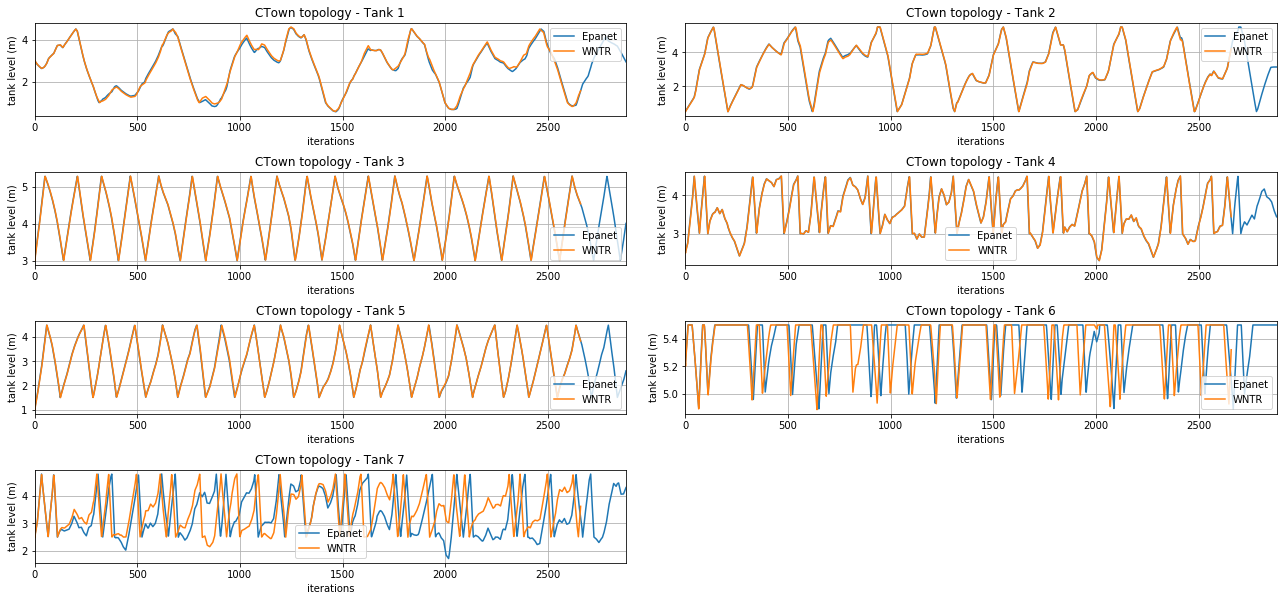

In [7]:
subplot_hspace = 0.6
subplot_wspace = 0.1

dd = plt.subplot(4,2,1)
epanet_ctown_pressure_results["T1"].plot(label='Epanet', ax=dd)
wntr_ctown_resuls_results["T1_LEVEL"].plot(label='WNTR', ax=dd)
plt.title("CTown topology - Tank 1")
plt.xlabel('iterations')
plt.ylabel('tank level (m)')
plt.legend()
plt.subplots_adjust(top=2.00, right=3.00, hspace = subplot_hspace, wspace=subplot_wspace)
plt.grid(True)

dd = plt.subplot(4,2,2)
epanet_ctown_pressure_results["T2"].plot(label='Epanet', ax=dd)
wntr_ctown_resuls_results["T2_LEVEL"].plot(label='WNTR', ax=dd)
plt.title("CTown topology - Tank 2")
plt.xlabel('iterations')
plt.ylabel('tank level (m)')
plt.legend()
plt.subplots_adjust(top=2.00, right=3.00, hspace = subplot_hspace, wspace=subplot_wspace)
plt.grid(True)

dd = plt.subplot(4,2,3)
epanet_ctown_pressure_results["T3"].plot(label='Epanet', ax=dd)
wntr_ctown_resuls_results["T3_LEVEL"].plot(label='WNTR', ax=dd)
plt.title("CTown topology - Tank 3")
plt.xlabel('iterations')
plt.ylabel('tank level (m)')
plt.legend()
plt.subplots_adjust(top=2.00, right=3.00, hspace = subplot_hspace, wspace=subplot_wspace)
plt.grid(True)

dd = plt.subplot(4,2,4)
epanet_ctown_pressure_results["T4"].plot(label='Epanet', ax=dd)
wntr_ctown_resuls_results["T4_LEVEL"].plot(label='WNTR', ax=dd)
plt.title("CTown topology - Tank 4")
plt.xlabel('iterations')
plt.ylabel('tank level (m)')
plt.legend()
plt.subplots_adjust(top=2.00, right=3.00, hspace = subplot_hspace, wspace=subplot_wspace)
plt.grid(True)

dd = plt.subplot(4,2,5)
epanet_ctown_pressure_results["T5"].plot(label='Epanet', ax=dd)
wntr_ctown_resuls_results["T5_LEVEL"].plot(label='WNTR', ax=dd)
plt.title("CTown topology - Tank 5")
plt.xlabel('iterations')
plt.ylabel('tank level (m)')
plt.legend()
plt.subplots_adjust(top=2.00, right=3.00, hspace = subplot_hspace, wspace=subplot_wspace)
plt.grid(True)

dd = plt.subplot(4,2,6)
epanet_ctown_pressure_results["T6"].plot(label='Epanet', ax=dd)
wntr_ctown_resuls_results["T6_LEVEL"].plot(label='WNTR', ax=dd)
plt.title("CTown topology - Tank 6")
plt.xlabel('iterations')
plt.ylabel('tank level (m)')
plt.legend()
plt.subplots_adjust(top=2.00, right=3.00, hspace = subplot_hspace, wspace=subplot_wspace)
plt.grid(True)


dd = plt.subplot(4,2,7)
epanet_ctown_pressure_results["T7"].plot(label='Epanet', ax=dd)
wntr_ctown_resuls_results["T7_LEVEL"].plot(label='WNTR', ax=dd)
plt.title("CTown topology - Tank 7")
plt.xlabel('iterations')
plt.ylabel('tank level (m)')
plt.legend()
plt.subplots_adjust(top=2.00, right=3.00, hspace = subplot_hspace, wspace=subplot_wspace)
plt.grid(True)